In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
0,40163,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,NaN,NaN,NaN,NaN,RblWthACoz
1,8135,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,NaN,NaN,NaN,NaN,BeerSox
2,10529,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,NaN,NaN,NaN,Male,mschofield
3,44610,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",1308532025,1.209827e+09,"Aug 10, 1976",208508400.0,Male,molegar76
4,37062,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...",1299912708,NaN,NaN,NaN,NaN,Brewbro000


In [4]:
data.shape

(37500, 19)

In [5]:
data.size

712500

In [6]:
data.describe()

,index,beer/ABV,beer/beerId,beer/brewerId,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/timeUnix,user/ageInSeconds,user/birthdayUnix
count,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.00000,37500.000000,37500.000000,3.750000e+04,7.856000e+03,7.856000e+03
mean,24951.887573,7.403725,21861.152027,3036.595120,3.900053,3.873240,3.88944,3.854867,3.922440,1.232794e+09,1.176705e+09,2.416303e+08
std,14434.009669,2.318145,18923.130832,5123.084675,0.588778,0.680865,0.70045,0.668068,0.716504,7.190955e+07,3.375514e+08,3.375514e+08
min,0.000000,0.100000,175.000000,1.000000,0.000000,1.000000,0.00000,1.000000,1.000000,9.262944e+08,7.034366e+08,-2.208960e+09
25%,12422.500000,5.400000,5441.000000,395.000000,3.500000,3.500000,3.50000,3.500000,3.500000,1.189194e+09,9.794810e+08,1.433628e+08
50%,24942.500000,6.900000,17538.000000,1199.000000,4.000000,4.000000,4.00000,4.000000,4.000000,1.248150e+09,1.100009e+09,3.183264e+08
75%,37416.750000,9.400000,34146.000000,1315.000000,4.500000,4.500000,4.50000,4.500000,4.500000,1.291330e+09,1.274973e+09,4.388544e+08
max,49999.000000,57.700000,77207.000000,27797.000000,5.000000,5.000000,5.00000,5.000000,5.000000,1.326267e+09,3.627295e+09,7.148988e+08


In [7]:
data["review/text"].isnull().sum()

10

In [8]:
# Filling missing review texts with empty strings
data['review/text'] = data['review/text'].fillna('')  

In [9]:
# Dropping columns that are not useful for prediction
data = data.drop(columns=['index', 'review/timeStruct', 'user/birthdayRaw', 'user/birthdayUnix'])

In [10]:
# Filling missing user/gender and user/ageInSeconds values
data['user/gender'] = data['user/gender'].fillna('Unknown')
data['user/ageInSeconds'] = data['user/ageInSeconds'].fillna(data['user/ageInSeconds'].median())

In [11]:
# Check for missing values
print(data.isnull().sum())

beer/ABV             0
beer/beerId          0
beer/brewerId        0
beer/name            0
beer/style           0
review/appearance    0
review/aroma         0
review/overall       0
review/palate        0
review/taste         0
review/text          0
review/timeUnix      0
user/ageInSeconds    0
user/gender          0
user/profileName     5
dtype: int64


# EDA

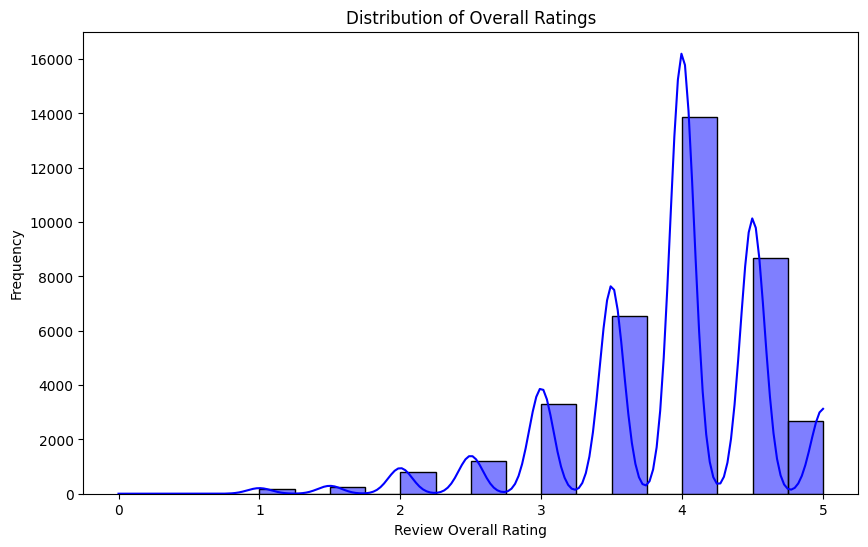

In [12]:
# distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(data['review/overall'], bins=20, kde=True, color='blue')
plt.title('Distribution of Overall Ratings')
plt.xlabel('Review Overall Rating')
plt.ylabel('Frequency')
plt.show()

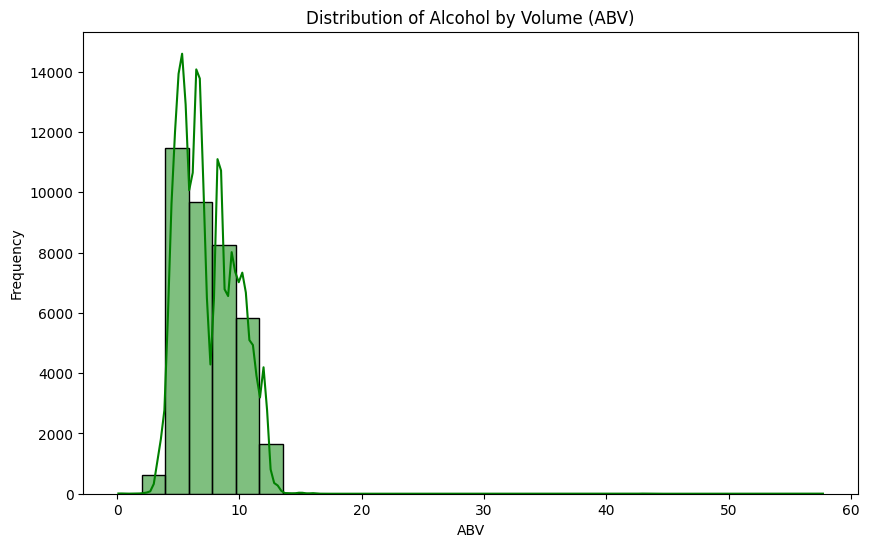

In [13]:
# distribution of ABV 
plt.figure(figsize=(10, 6))
sns.histplot(data['beer/ABV'], bins=30, kde=True, color='green')
plt.title('Distribution of Alcohol by Volume (ABV)')
plt.xlabel('ABV')
plt.ylabel('Frequency')
plt.show()

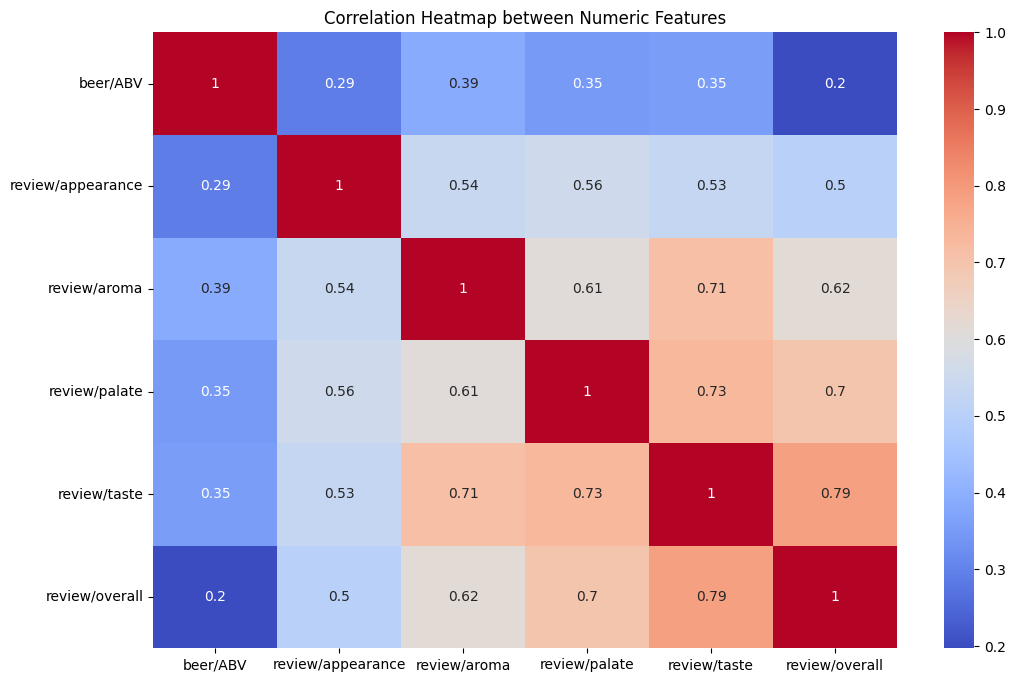

In [14]:
# correlations between numeric features
plt.figure(figsize=(12, 8))
corr = data[['beer/ABV', 'review/appearance', 'review/aroma', 'review/palate', 'review/taste', 'review/overall']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap between Numeric Features')
plt.show()

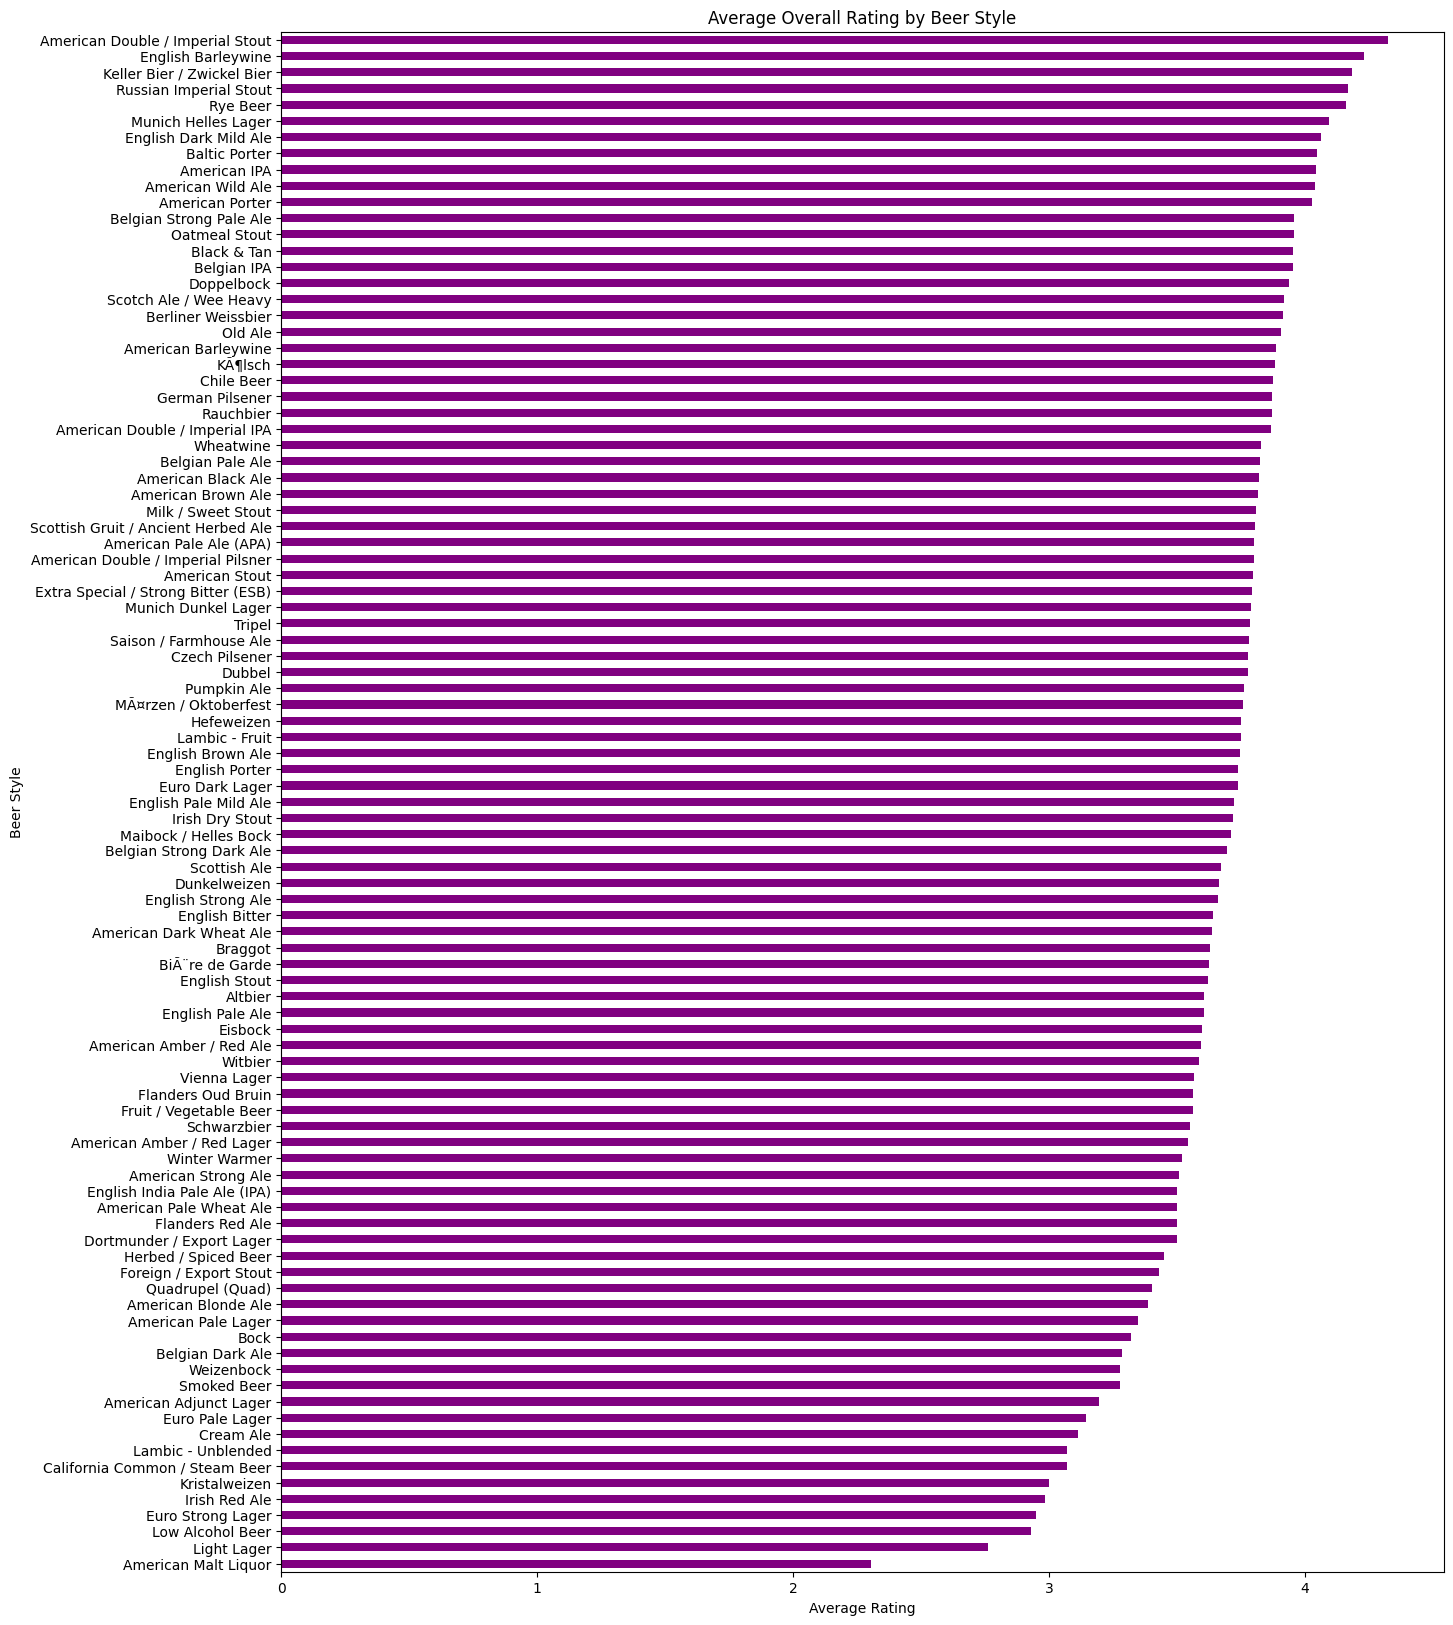

In [15]:
# average rating by beer style
plt.figure(figsize=(15, 20))
avg_rating_by_style = data.groupby('beer/style')['review/overall'].mean().sort_values()
avg_rating_by_style.plot(kind='barh', color='purple')
plt.title('Average Overall Rating by Beer Style')
plt.xlabel('Average Rating')
plt.ylabel('Beer Style')
plt.show()

# NLP APPROACH FOR REVIEW/TEXT

In [16]:
from wordcloud import WordCloud

text = " ".join(review for review in data['review/text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

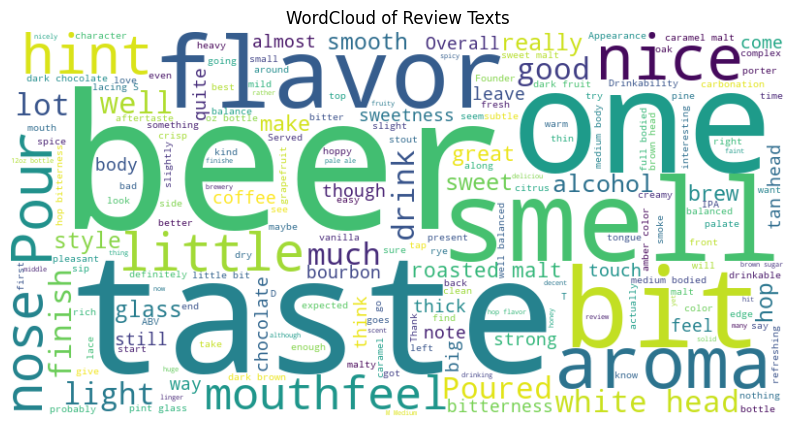

In [17]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('WordCloud of Review Texts')
plt.show()

In [18]:
# unique words in each review
data['word_count'] = data['review/text'].apply(lambda x: len(x.split()))
data['char_count'] = data['review/text'].apply(lambda x: len(x))

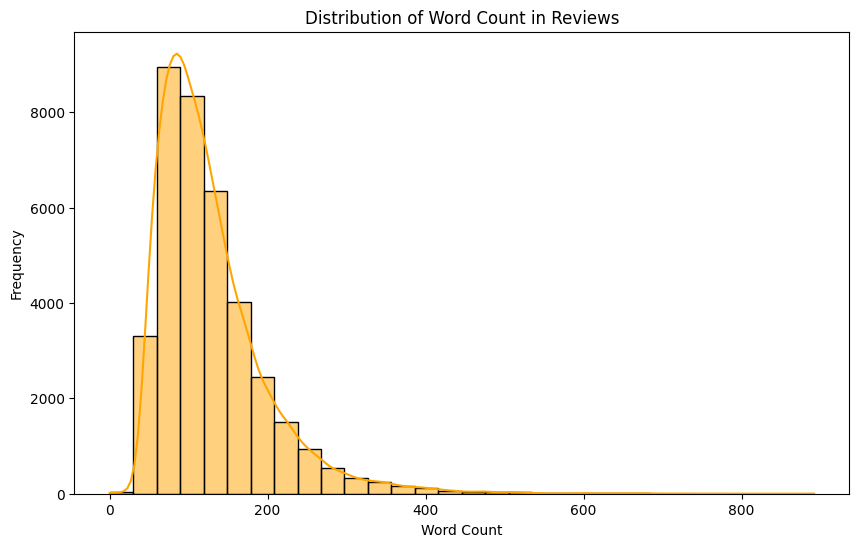

In [19]:
# word count distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['word_count'], bins=30, kde=True, color='orange')
plt.title('Distribution of Word Count in Reviews')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

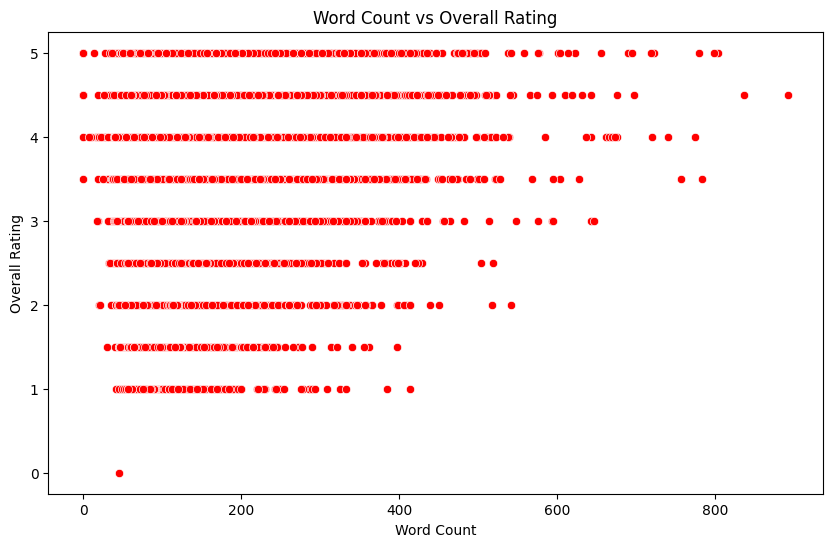

In [20]:
# Relationship between word count and review rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='word_count', y='review/overall', data=data, color='red')
plt.title('Word Count vs Overall Rating')
plt.xlabel('Word Count')
plt.ylabel('Overall Rating')
plt.show()

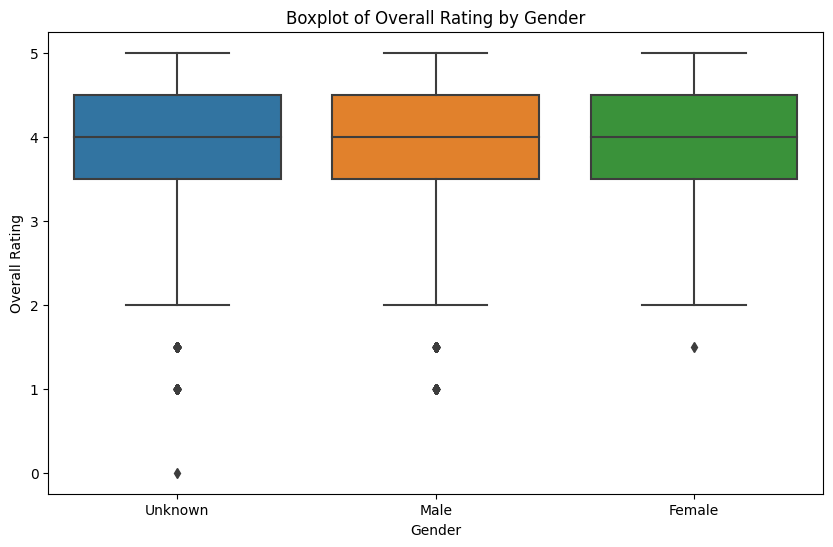

In [21]:
# Distribution of ratings by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='user/gender', y='review/overall', data=data)
plt.title('Boxplot of Overall Rating by Gender')
plt.xlabel('Gender')
plt.ylabel('Overall Rating')
plt.show()

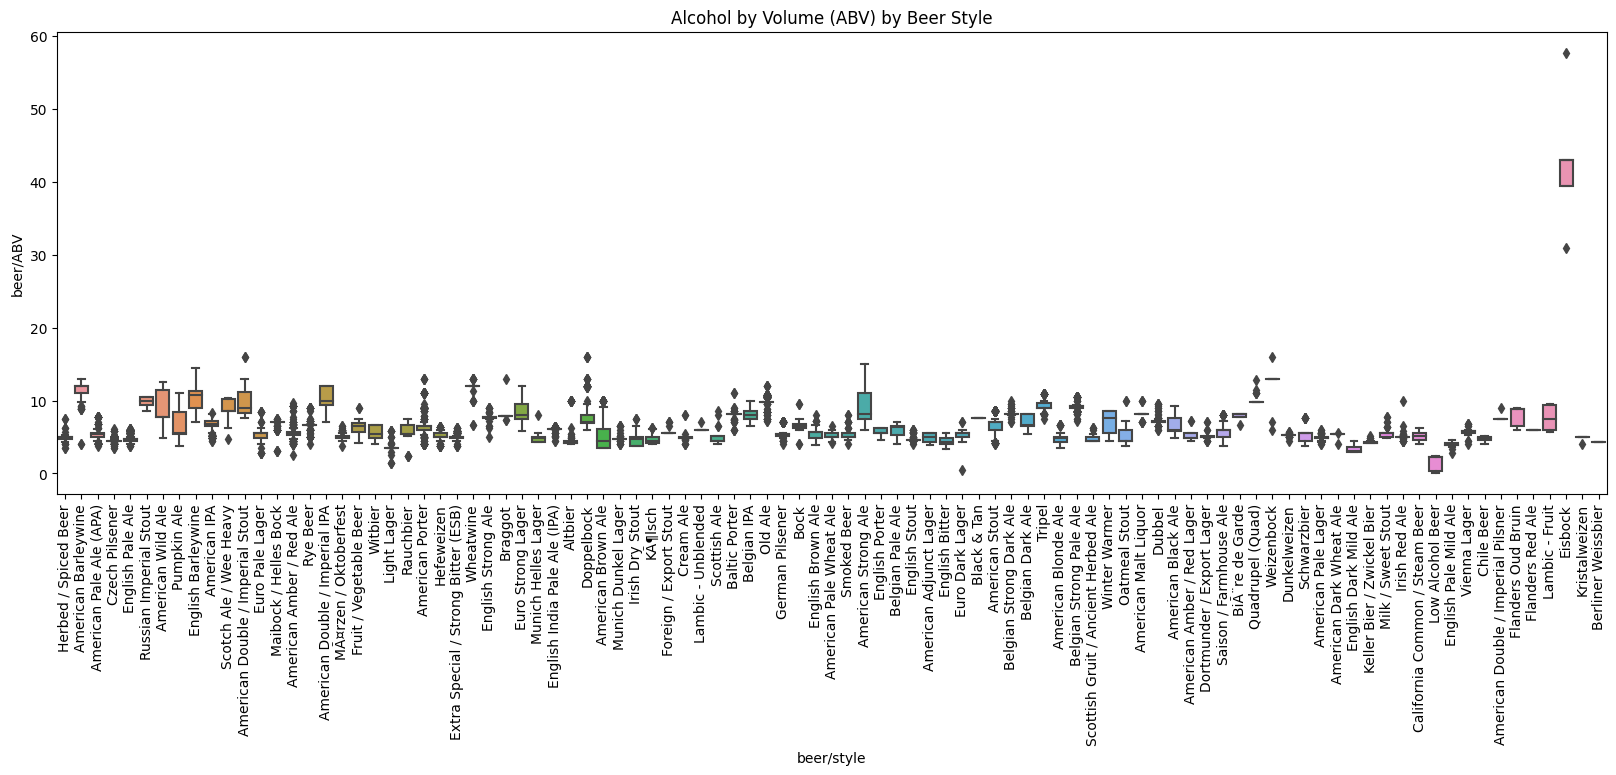

In [22]:
# Analyzing how ABV varies by beer style
plt.figure(figsize=(20, 6))
sns.boxplot(x='beer/style', y='beer/ABV', data=data)
plt.xticks(rotation=90)
plt.title('Alcohol by Volume (ABV) by Beer Style')
plt.show()

# APPROACH 1 : Only using Review/Text with numeric features For Model Building

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

In [24]:
tfidf = TfidfVectorizer(max_features=100, stop_words='english')
tfidf_features = tfidf.fit_transform(data['review/text']).toarray()

In [25]:
print(tfidf_features)

[[0.         0.288713   0.         ... 0.         0.         0.20565608]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.22564373]
 ...
 [0.         0.17435833 0.         ... 0.         0.         0.12419895]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.20067149 0.         0.         ... 0.         0.         0.        ]]


In [26]:
numeric_features = ['beer/ABV', 'review/appearance', 'review/aroma', 'review/palate', 'review/taste', 'user/ageInSeconds']

# Scaling
scaler = StandardScaler()
scaled_numeric_features = scaler.fit_transform(data[numeric_features])

In [27]:
print(scaled_numeric_features)

[[-1.03693104  0.16975489  0.18617733  0.21724624  0.10824925 -0.10194337]
 [ 1.5513795   0.16975489 -0.54819207 -0.53119052 -1.28743477 -0.10194337]
 [-1.16634657 -0.67947249  0.18617733 -0.53119052 -0.58959276 -0.10194337]
 ...
 [-1.14477731  0.16975489 -0.54819207  0.965683    0.10824925 -0.10194337]
 [ 1.63765652  0.16975489  0.18617733  1.71411976  1.50393327 -0.10194337]
 [ 0.47291678  0.16975489  0.18617733  0.965683    0.10824925 -0.10194337]]


In [28]:
X = np.hstack((scaled_numeric_features, tfidf_features))
y = data['review/overall']

# Model Building

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(30000, 106)
(7500, 106)
(30000,)
(7500,)


1.Linear regression

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [33]:
#prediction

y_pred=regressor.predict(X_test)

In [34]:
#Mean absolute error
print("MAE: ",mean_absolute_error(y_test,y_pred))
print("MSE: ",mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test, y_pred)
print("R2 Score:  ",r2)

MAE:  0.30017783928161845
MSE:  0.15595085039002207
R2 Score:   0.6829736199191763


2.Decision tree

In [35]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [36]:
#predicting
y_preddt=dt.predict(X_test)
y_preddt

array([4.5, 3.5, 1.5, ..., 3.5, 5. , 3. ])

In [37]:
#Mean absolute error
print("MAE: ",mean_absolute_error(y_test,y_preddt))
print("MSE: ",mean_squared_error(y_test,y_preddt))
r2_dt = r2_score(y_test, y_preddt)
print("R2 Score:  ",r2_dt)

MAE:  0.3893333333333333
MSE:  0.30766666666666664
R2 Score:   0.3745564749346991


3.Random Forest

In [38]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [39]:
#predicting
y_predrf=dt.predict(X_test)
y_predrf

array([4.5, 3.5, 1.5, ..., 3.5, 5. , 3. ])

In [40]:
#Mean absolute error
print("MAE: ",mean_absolute_error(y_test,y_predrf))
print("MSE: ",mean_squared_error(y_test,y_predrf))
r2_rf = r2_score(y_test, y_predrf)
print("R2 Score:  ",r2_rf)

MAE:  0.3893333333333333
MSE:  0.30766666666666664
R2 Score:   0.3745564749346991


# Conclusion:
1.linear regression works best for this problem statement.

2.linear regression outperformed Decision tree and random forest models.

# APPROACH 2 : Skipping review/text & only using numeric features in the data

In [41]:
X1=scaled_numeric_features

In [42]:
y1= data['review/overall']

In [43]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [44]:
print(X_train1.shape)
print(X_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(30000, 6)
(7500, 6)
(30000,)
(7500,)


1.Linear regression

In [45]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train1,y_train1)

LinearRegression()

In [46]:
#prediction

y_pred1=regressor.predict(X_test1)

In [47]:
#Mean absolute error
print("MAE: ",mean_absolute_error(y_test1,y_pred))
print("MSE: ",mean_squared_error(y_test1,y_pred))
r2 = r2_score(y_test1, y_pred1)
print("R2 Score:  ",r2)

MAE:  0.30017783928161845
MSE:  0.15595085039002207
R2 Score:   0.6732055255581222


# Conclusion :

1.No increase in terms of accuracy,should consider review/text column for production model

# Approach 3 : Using text features like beer/name and beer/style for model building by converting them to numeric using one-hot encoding 
# Lets also use gender column
    

In [48]:
data.head()

,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeUnix,user/ageInSeconds,user/gender,user/profileName,word_count,char_count
0,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,1229398690,1.100009e+09,Unknown,RblWthACoz,94,519
1,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,1218238738,1.100009e+09,Unknown,BeerSox,102,568
2,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,1101492422,1.100009e+09,Male,mschofield,67,392
3,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,1308532025,1.209827e+09,Male,molegar76,67,391
4,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,1299912708,1.100009e+09,Unknown,Brewbro000,93,486


In [49]:
set(data['beer/name'])

{'Weekapaug Gruit Ale',
 'Spinal Pumpkin',
 'Jolly Ploughman',
 'Kiper Lager',
 "Founders Red's Rye PA",
 'Otro Mundo Golden Ale',
 'Barnstormer',
 'Sternquell Pils',
 'Taps Saphir Ale',
 'Pumpkin Beer',
 'Mango Beer',
 'Honey Fayre',
 'Pike India Pale Ale',
 '1906 Reserva Especial',
 'Ter Dolen Double Dark',
 'American Red Ale',
 'Founders Corn Mountain Brown',
 'Curacao Triple XXX',
 'Yorkshire Square Ale',
 "Bannatyne's Scotch Ale",
 'Eliksir',
 'Emma Belgian Abbey Trippel',
 'Trafalgar Black Bullet',
 'Highlands American Brown',
 'Okocim Mocne Premium Malt Liquor',
 "Emily's Ember",
 'Conscious Sedaison',
 'Hurricane Hefeweizen',
 'PrÃ¶jekt H50 KÃ¶lsch',
 'Aldersbacher Kloster Weisse Hell',
 'Powder Monkey Porter',
 'American Pale Ale',
 "Monty Python's Holy Grail Ale Black Knight's Reserve",
 'Urutislav',
 'Strawberry Anti-Social',
 "Professor Gesser's Mind Numbing Ale",
 'Varnensko',
 'Club Premium Lager',
 'Altitude Amber Ale',
 'Sledgehammer Double IPA',
 'B.O.R.I.S. #100',
 "O

In [50]:
set(data['beer/style'])

{'Altbier',
 'American Adjunct Lager',
 'American Amber / Red Ale',
 'American Amber / Red Lager',
 'American Barleywine',
 'American Black Ale',
 'American Blonde Ale',
 'American Brown Ale',
 'American Dark Wheat Ale',
 'American Double / Imperial IPA',
 'American Double / Imperial Pilsner',
 'American Double / Imperial Stout',
 'American IPA',
 'American Malt Liquor',
 'American Pale Ale (APA)',
 'American Pale Lager',
 'American Pale Wheat Ale',
 'American Porter',
 'American Stout',
 'American Strong Ale',
 'American Wild Ale',
 'Baltic Porter',
 'Belgian Dark Ale',
 'Belgian IPA',
 'Belgian Pale Ale',
 'Belgian Strong Dark Ale',
 'Belgian Strong Pale Ale',
 'Berliner Weissbier',
 'BiÃ¨re de Garde',
 'Black & Tan',
 'Bock',
 'Braggot',
 'California Common / Steam Beer',
 'Chile Beer',
 'Cream Ale',
 'Czech Pilsener',
 'Doppelbock',
 'Dortmunder / Export Lager',
 'Dubbel',
 'Dunkelweizen',
 'Eisbock',
 'English Barleywine',
 'English Bitter',
 'English Brown Ale',
 'English Dark Mi

In [51]:
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder(sparse=False, handle_unknown='ignore')
onehot_encoded = onehot.fit_transform(data[['beer/name', 'beer/style']])
gender_onehot = onehot.fit_transform(data[['user/gender']])

In [52]:
X3 = np.hstack((scaled_numeric_features, tfidf_features, onehot_encoded, gender_onehot))
y3 = data['review/overall']

In [53]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [54]:
print(X_train3.shape)
print(X_test3.shape)
print(y_train3.shape)
print(y_test3.shape)

(30000, 1892)
(7500, 1892)
(30000,)
(7500,)


In [55]:
regressor=LinearRegression()
regressor.fit(X_train3,y_train3)

LinearRegression()

In [56]:
#prediction

y_pred3=regressor.predict(X_test3)

In [57]:
#Mean absolute error
print("MAE: ",mean_absolute_error(y_test3,y_pred3))
print("MSE: ",mean_squared_error(y_test3,y_pred3))
r2 = r2_score(y_test3, y_pred3)
print("R2 Score:  ",r2)

MAE:  11215921.898957185
MSE:  2.0971972102948536e+16
R2 Score:   -4.263310127726745e+16


# Conclusion:

1.Using the text features like beer style and beer name by converting them to numeric for model building was not a good idea.